In [1]:
import matplotlib.pyplot as plt
import seaborn as sb
import pandas as pd
import numpy as np

In [2]:
fcn8s_pd = pd.read_csv('results_fcn8s.csv')
fcn8s_pd

,trainc1,trainc2,trainc3,trainc4,trainc5,trainc6,trainc7,trainc8,testc1,testc2,testc3,testc4,testc5,testc6,testc7,testc8,model
0,0.342284,0.482713,0.534252,0.488004,0.162108,0.024922,0.021108,0.000905,0.296177,0.538397,0.47766,0.472319,0.158344,0.020946,0.019576,0.001154,fcn8s


In [3]:
fpn_pd = pd.read_csv('results_fpn.csv')
fpn_pd

,trainc1,trainc2,trainc3,trainc4,trainc5,trainc6,trainc7,trainc8,testc1,testc2,testc3,testc4,testc5,testc6,testc7,testc8,model
0,0.643695,0.737693,0.756532,0.766281,0.609184,0.528928,0.502179,0.375862,0.51602,0.777568,0.656031,0.69944,0.494889,0.368847,0.396739,0.241798,fpn


In [4]:
unet_pd = pd.read_csv('results_unet.csv')
unet_pd

,trainc1,trainc2,trainc3,trainc4,trainc5,trainc6,trainc7,trainc8,testc1,testc2,testc3,testc4,testc5,testc6,testc7,testc8,model
0,0.559228,0.693155,0.713333,0.708073,0.528504,0.473093,0.446189,0.220065,0.421449,0.698717,0.589297,0.632687,0.397078,0.337023,0.334899,0.139754,unet


In [27]:
results_all = pd.concat([fpn_pd, fcn8s_pd, unet_pd])

results_all.to_csv('results.csv')

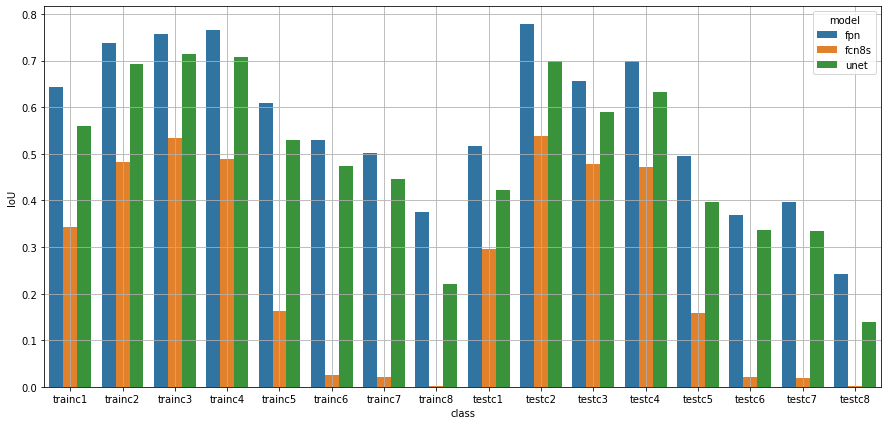

In [28]:
fg, ax = plt.subplots(figsize=(15, 7))
sb.barplot(data=results_all.melt(id_vars='model').drop_duplicates(), y='value', x='variable', hue='model', ax=ax)
ax.set_xlabel('class')
ax.set_ylabel('IoU')
ax.grid()

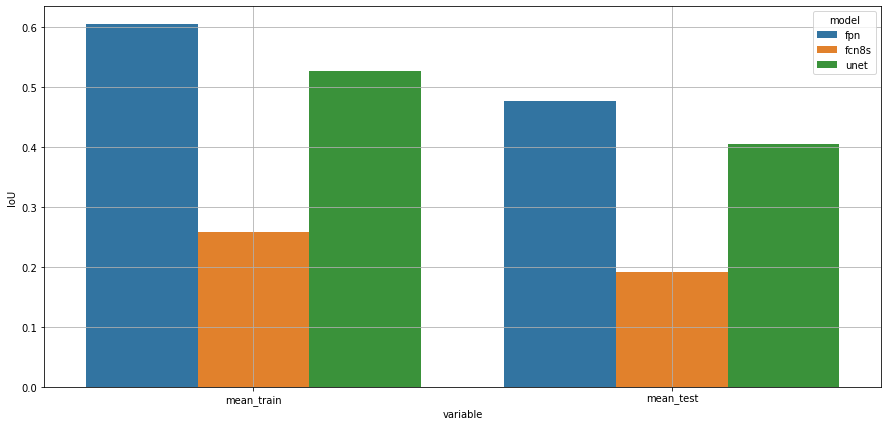

In [29]:
mean_results = results_all.copy()
mean_results['mean_train'] = results_all.iloc[:,2:10].mean(axis=1)
mean_results['mean_test'] = results_all.iloc[:,10:].mean(axis=1)
mean_results = mean_results[['mean_train', 'mean_test', 'model']]

fg, ax = plt.subplots(figsize=(15, 7))
sb.barplot(data=mean_results.melt(id_vars='model').drop_duplicates(), y='value', x='variable', hue='model', ax=ax)
# ax.set_xlabel('class')
ax.set_ylabel('IoU')
ax.grid()

In [30]:
mean_results

,mean_train,mean_test,model
0,0.604069,0.476291,fpn
0,0.258234,0.191666,fcn8s
0,0.526178,0.405123,unet
